## Problem 1

Compute the first derivative of $x^2$, $x^3$, $e^{-x}$, and another well-behaved, non-trivial, function of your choice, using forward difference, central difference, and 5-point approximation. Discuss the order of the error.

a. In each case plot the error as function of step size (consider using log-log scales)

b. In your discussion, make sure to talk about the best step size to use (refer to the
discussion made in class about competition between algorithmic error and round-
off error).

c. Make sure to pay special consideration to the particular cases where a given
approximation is expected to be exact.

<ipython-input-5-a8855e593a38>:9: RuntimeWarning: divide by zero encountered in log
  "$f(x) = ln(x+1)$": (lambda x: np.log(x + 1), lambda x: 1 / (x + 1))


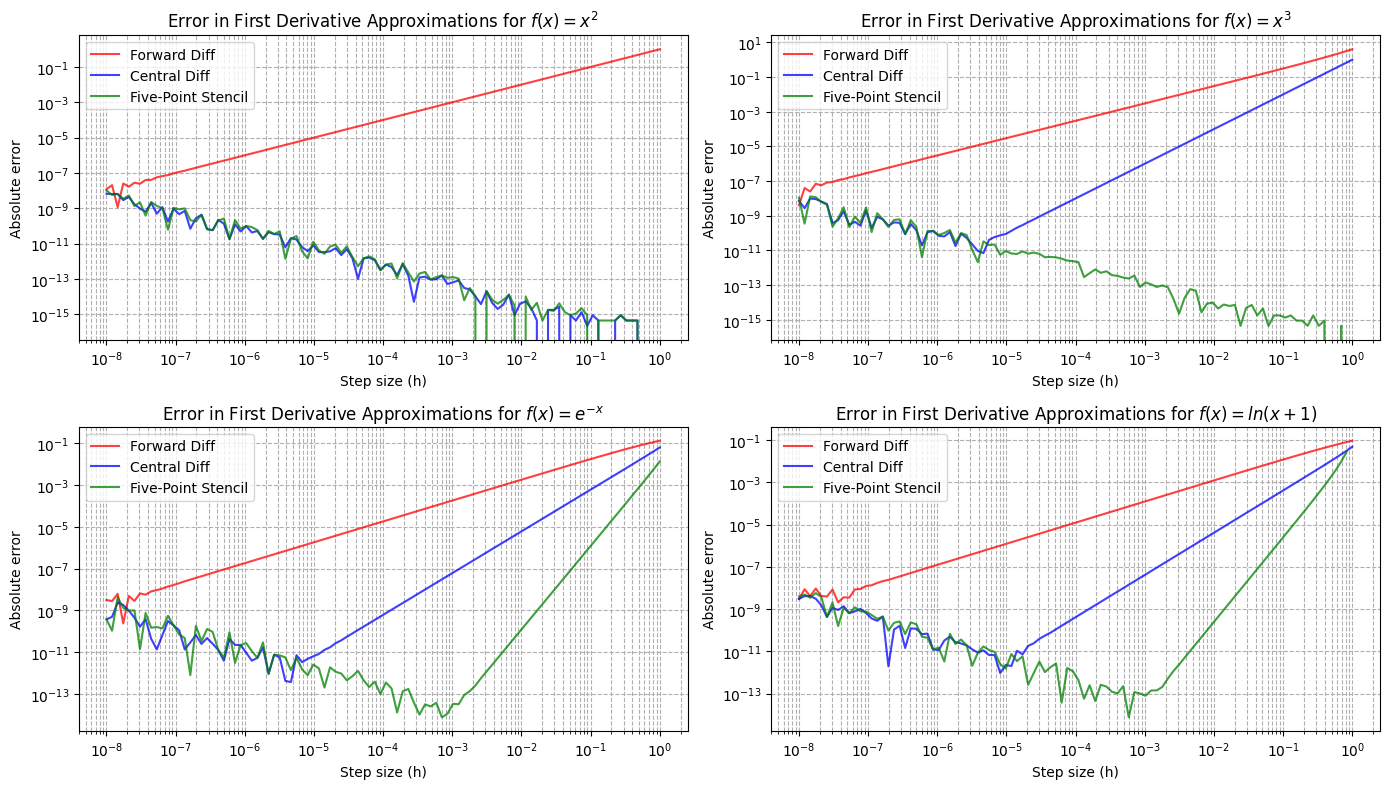

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define functions and their exact derivatives
functions = {
    "$f(x) = x^2$": (lambda x: x**2, lambda x: 2*x),
    "$f(x) = x^3$": (lambda x: x**3, lambda x: 3*x**2),
    "$f(x) = e^{-x}$": (lambda x: np.exp(-x), lambda x: -np.exp(-x)),
    "$f(x) = ln(x+1)$": (lambda x: np.log(x + 1), lambda x: 1 / (x + 1))
}

# Derivative approximations
def forward_diff(f, x, h):
    return (f(x + h) - f(x)) / h

def central_diff(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def five_point_stencil(f, x, h):
    return (-f(x + 2*h) + 8*f(x + h) - 8*f(x - h) + f(x - 2*h)) / (12 * h)

# Compute errors for different step sizes
x = 1.0  # Point at which we compute derivatives
h_values = np.logspace(-8, 0, 100)  # Step sizes

# Prepare 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
axs = axs.flatten()  # Flatten to 1D array for easier indexing

# Compute and plot errors for each function and method
for i, (name, (func, true_derivative)) in enumerate(functions.items()):
    errors_forward = [np.abs(forward_diff(func, x, h) - true_derivative(x)) for h in h_values]
    errors_central = [np.abs(central_diff(func, x, h) - true_derivative(x)) for h in h_values]
    errors_five_point = [np.abs(five_point_stencil(func, x, h) - true_derivative(x)) for h in h_values]

    # Plotting on the i-th subplot
    axs[i].loglog(h_values, errors_forward, label='Forward Diff', color='red', alpha=0.75)
    axs[i].loglog(h_values, errors_central, label='Central Diff', color='blue', alpha=0.75)
    axs[i].loglog(h_values, errors_five_point, label='Five-Point Stencil', color='green', alpha=0.75)
    axs[i].set_xlabel('Step size (h)')
    axs[i].set_ylabel('Absolute error')
    axs[i].set_title(f'Error in First Derivative Approximations for {name}')
    axs[i].legend()
    axs[i].grid(True, which="both", ls="--")

# Adjust layout
plt.tight_layout()
plt.show()


## Problem 2

Provide a derivation of the second derivative central difference formula. (Make sure to provide an estimate of the algorithmic error).

Show a case (analytically) where you expect the formula to be exact.

## Problem 3

Finding roots:

a. Write a program to find the zero of a function using the bisection method.

b. Write a program to find the zero of a function using the Newton-Raphson method.
Compare with the previous method.

c. Both methods find a local zero. Can you think of a way to find other zeros by
adapting the above techniques?

In [ ]:
def bisection_method(f, a, b, tol=1e-5, max_iterations=1000):
    '''
    Finds a root of the function f within the interval [a, b] using the bisection method.

    f: Function for which the root is sought
    a: Lower bound of the interval
    b: Upper bound of the interval
    tol: Tolerance for the root's accuracy
    max_iterations: Maximum number of iterations to perform
    '''
    if f(a) * f(b) >= 0:
        print("Bisection method fails.")
        return None

    iteration = 0
    while (b - a) / 2 > tol:
        iteration += 1
        c = (a + b) / 2
        if f(c) == 0 or (b - a) / 2 < tol:
            return c
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c

        if iteration >= max_iterations:
            print("Max iterations reached.")
            return None
    return (a + b) / 2

In [ ]:
def newton_raphson_method(f, df, x0, tol=1e-5, max_iterations=1000):
    '''
    Finds a root of the function f using the Newton-Raphson method.

    f: Function for which the root is sought
    df: Derivative of the function f
    x0: Initial guess for the root
    tol: Tolerance for the root's accuracy
    max_iterations: Maximum number of iterations to perform
    '''
    xn = x0
    for n in range(max_iterations):
        fxn = f(xn)
        if abs(fxn) < tol:
            return xn
        dfxn = df(xn)
        if dfxn == 0:
            print("Zero derivative. No solution found.")
            return None
        xn = xn - fxn / dfxn
    print("Max iterations reached. No solution found.")
    return None

In [ ]:
# Define functions and their derivatives
f = lambda x: x**3 - 2
df = lambda x: 3*x**2
g = lambda x: np.cos(x) - x
dg = lambda x: -np.sin(x) - 1

# Apply both methods to find roots
root_bisection_f = bisection_method(f, 0, 2)
root_newton_raphson_f = newton_raphson_method(f, df, 1)  # Starting close to sqrt(2)

root_bisection_g = bisection_method(g, 0, 1)
root_newton_raphson_g = newton_raphson_method(g, dg, 0.5)  # Starting close to the root of cos(x) = x

(root_bisection_f, root_newton_raphson_f, root_bisection_g, root_newton_raphson_g)

(1.2599258422851562,
 1.2599210500177698,
 0.7390823364257812,
 0.7390851339208068)